Adjacency Matrix – Graph 1 (Undirected):
[[0 1 1 0 0]
 [1 0 1 1 0]
 [1 1 0 1 0]
 [0 1 1 0 1]
 [0 0 0 1 0]]


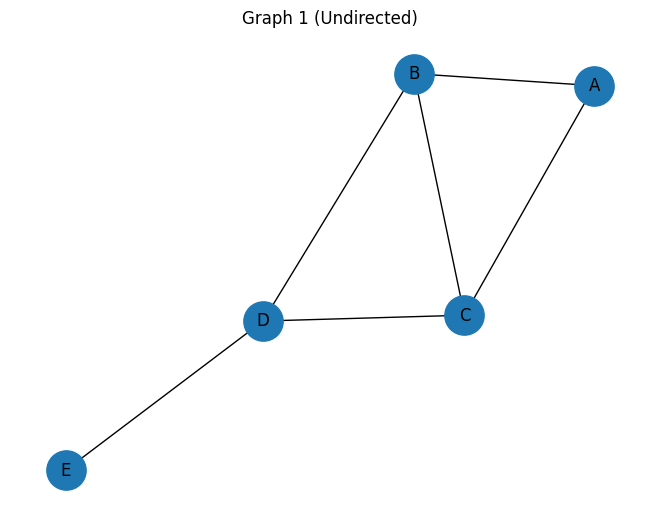

Adjacency Matrix – Graph 2 (Directed):
[[0 1 1 0 0]
 [0 0 1 0 1]
 [0 0 0 1 0]
 [0 1 0 0 1]
 [0 0 0 0 0]]


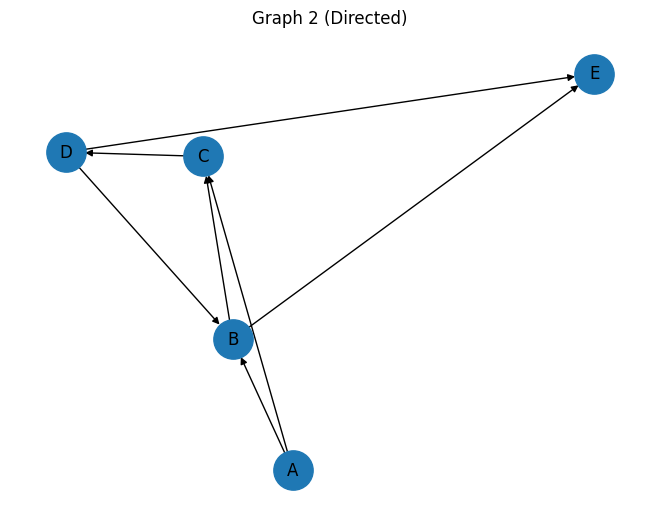


Unique cycle in Graph 2:
B → C → D → B


In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# Convert CSC → adjacency matrix
# -----------------------------------------------------------
def csc_to_adj(col_ptrs, row_idx, n):
    adj = np.zeros((n, n), dtype=int)
    for col in range(n):
        start = col_ptrs[col]
        end = col_ptrs[col+1]
        for r in row_idx[start:end]:
            adj[r][col] = 1
    return adj


# -----------------------------------------------------------
# Graph 1 (undirected)
# -----------------------------------------------------------
col1 = [0, 2, 5, 8, 11, 12]
row1 = [1,2, 0,2,3, 0,1,3, 1,2,4, 3]

A1 = csc_to_adj(col1, row1, 5)
print("Adjacency Matrix – Graph 1 (Undirected):")
print(A1)

# Draw Graph 1
G1 = nx.Graph()
labels = {0:"A",1:"B",2:"C",3:"D",4:"E"}
G1.add_nodes_from(labels.keys())

for i in range(5):
    for j in range(5):
        if A1[i][j] == 1:
            G1.add_edge(i,j)

plt.figure()
nx.draw(G1, with_labels=True, labels=labels, node_size=800)
plt.title("Graph 1 (Undirected)")
plt.show()


# -----------------------------------------------------------
# Graph 2 (directed)
# -----------------------------------------------------------
col2 = [0,0,2,4,5,7]
row2 = [0,3, 0,1, 2, 1,3]

A2 = csc_to_adj(col2, row2, 5)
print("Adjacency Matrix – Graph 2 (Directed):")
print(A2)

# Draw Graph 2
G2 = nx.DiGraph()
G2.add_nodes_from(labels.keys())

for i in range(5):
    for j in range(5):
        if A2[i][j] == 1:
            G2.add_edge(i,j)

plt.figure()
nx.draw(G2, with_labels=True, labels=labels, arrows=True, node_size=800)
plt.title("Graph 2 (Directed)")
plt.show()


# -----------------------------------------------------------
# Find the cycle in the directed graph
# -----------------------------------------------------------
def find_cycle_directed(G):
    try:
        cycle = nx.find_cycle(G, orientation="original")
        # Convert to readable labels: A -> B -> C -> A
        path = []
        for u,v,_ in cycle:
            path.append(labels[u])
        path.append(labels[cycle[0][0]])
        return " → ".join(path)
    except:
        return "No cycle"

cycle2 = find_cycle_directed(G2)
print("\nUnique cycle in Graph 2:")
print(cycle2)
